In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, mannwhitneyu
import seaborn as sns

### Cleaning of Data

In [2]:
file_path = 'core/crime-housing-austin-2015.csv'
df_crime_housing = pd.read_csv(file_path)

In [3]:
df_crime_housing_clean = df_crime_housing[['Highest_NIBRS_UCR_Offense_Description', 'Populationbelowpovertylevel']].dropna()
df_crime_housing_clean['Poverty_level'] = pd.to_numeric(df_crime_housing_clean['Populationbelowpovertylevel'].str.replace('%', ''), errors='coerce')

df_factors = df_crime_housing[['Zip_Code_Crime',
                               'Rentalunitsaffordabletoaverageretail/serviceworker',
                               'Ownerunitsaffordabletoaverageretail/serviceworker',
                               'Populationbelowpovertylevel',
                               'Medianrent',
                               'Medianhomevalue']].dropna()
df_factors['Rental_Affordability'] = pd.to_numeric(df_factors['Rentalunitsaffordabletoaverageretail/serviceworker'].str.replace('%', ''), errors='coerce')
df_factors['Owner_Affordability'] = pd.to_numeric(df_factors['Ownerunitsaffordabletoaverageretail/serviceworker'].str.replace('%', ''), errors='coerce')
df_factors['Poverty_level'] = pd.to_numeric(df_factors['Populationbelowpovertylevel'].str.replace('%', ''), errors='coerce')
df_factors['Median_Rent'] = pd.to_numeric(df_factors['Medianrent'].str.replace('$', ''), errors='coerce')
df_factors['Median_HomeValue'] = pd.to_numeric(df_factors['Medianhomevalue'].str.replace('$', ''), errors='coerce')
crime_counts = df_crime_housing['Zip_Code_Crime'].value_counts().reset_index()
crime_counts.columns = ['Zip_Code_Crime', 'Crime_Count']
df_factors = df_factors.merge(crime_counts, how='inner', on='Zip_Code_Crime')

### Scatter plots of crime counts vs. affordability and poverty levels

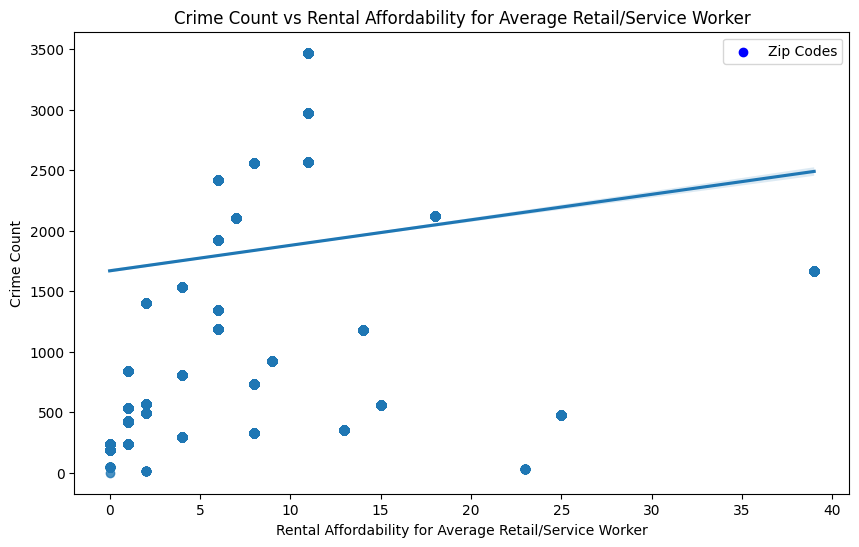

In [4]:
plt.figure(figsize=(10,6))
sns.regplot(x='Rental_Affordability', y='Crime_Count', data=df_factors)
plt.title('Crime Count vs Rental Affordability for Average Retail/Service Worker')
plt.scatter([], [], color='blue', label='Zip Codes')
plt.ylabel('Crime Count')
plt.xlabel('Rental Affordability for Average Retail/Service Worker')
plt.legend()
plt.show()

In [5]:
corr, p_value = pearsonr(df_factors['Rental_Affordability'], df_factors['Crime_Count'])
print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")

Pearson correlation: 0.17849274235701723
P-value: 1.4978394859087415e-262


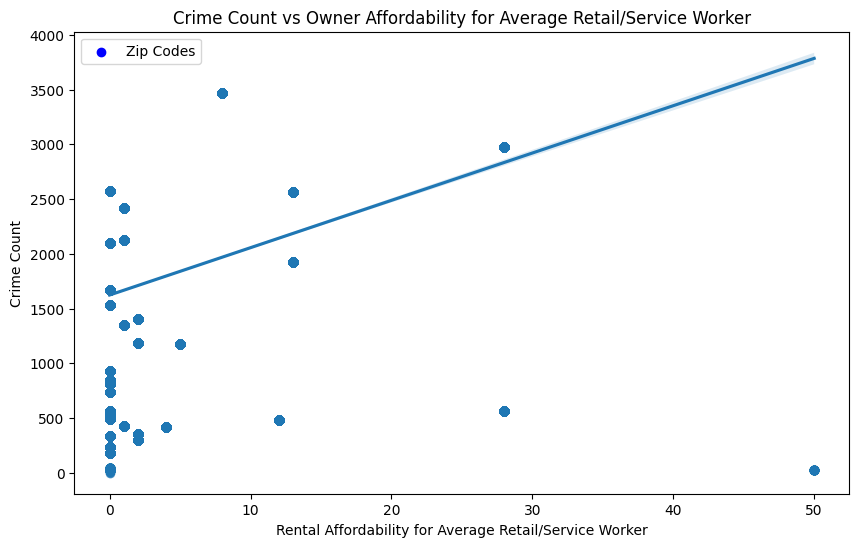

In [6]:
plt.figure(figsize=(10,6))
sns.regplot(x='Owner_Affordability', y='Crime_Count', data=df_factors)
plt.title('Crime Count vs Owner Affordability for Average Retail/Service Worker')
plt.ylabel('Crime Count')
plt.xlabel('Rental Affordability for Average Retail/Service Worker')
plt.scatter([], [], color='blue', label='Zip Codes')
plt.legend()
plt.show()

In [7]:
corr, p_value = pearsonr(df_factors['Owner_Affordability'], df_factors['Crime_Count'])
print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")

Pearson correlation: 0.3956678879240123
P-value: 0.0


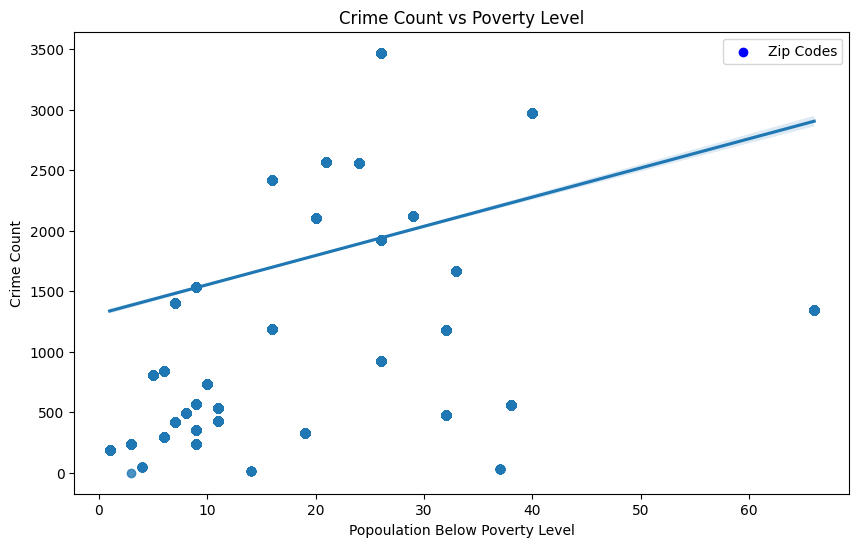

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(x='Poverty_level', y='Crime_Count', data=df_factors)
plt.title('Crime Count vs Poverty Level')
plt.scatter([], [], color='blue', label='Zip Codes')
plt.ylabel('Crime Count')
plt.xlabel('Popoulation Below Poverty Level')
plt.legend()
plt.show()

In [9]:
corr, p_value = pearsonr(df_factors['Poverty_level'], df_factors['Crime_Count'])
print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")

Pearson correlation: 0.33548189719520455
P-value: 0.0


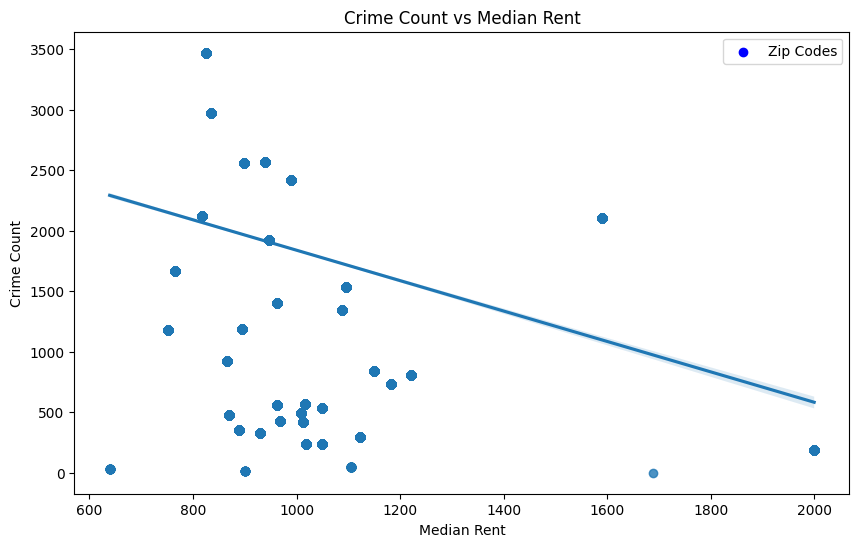

In [10]:
plt.figure(figsize=(10,6))
sns.regplot(x='Median_Rent', y='Crime_Count', data=df_factors)
plt.title('Crime Count vs Median Rent')
plt.scatter([], [], color='blue', label='Zip Codes')
plt.ylabel('Crime Count')
plt.xlabel('Median Rent')
plt.legend()
plt.show()

In [11]:
corr, p_value = pearsonr(df_factors['Median_Rent'], df_factors['Crime_Count'])
print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")

Pearson correlation: -0.2716959124912928
P-value: 0.0


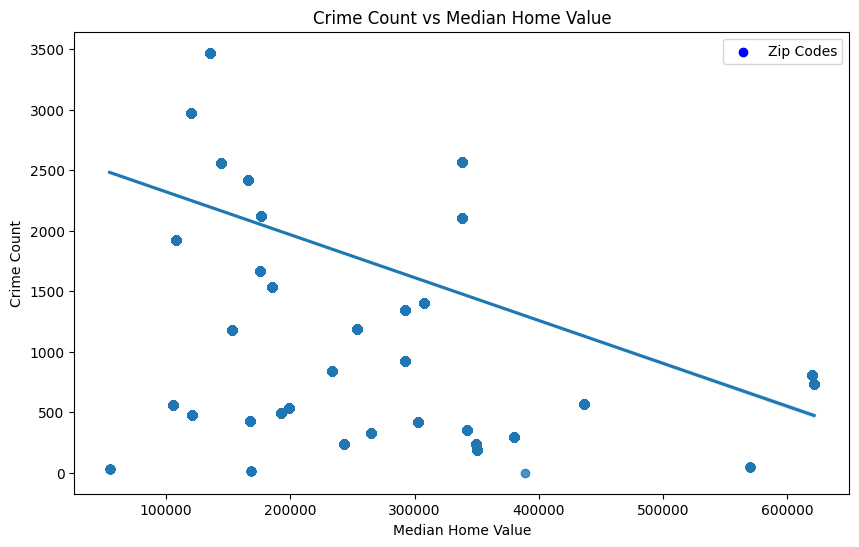

In [12]:
plt.figure(figsize=(10,6))
sns.regplot(x='Median_HomeValue', y='Crime_Count', data=df_factors)
plt.title('Crime Count vs Median Home Value')
plt.scatter([], [], color='blue', label='Zip Codes')
plt.ylabel('Crime Count')
plt.xlabel('Median Home Value')
plt.legend()
plt.show()

In [13]:
corr, p_value = pearsonr(df_factors['Median_HomeValue'], df_factors['Crime_Count'])
print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}")

Pearson correlation: -0.4486619466458439
P-value: 0.0


In [14]:
crime_df = pd.read_csv('core/crime-housing-austin-2015.csv')
zip_df = pd.read_csv('core/AustinZipCodes.csv')

### Crime Type Distribution by ZIP Code

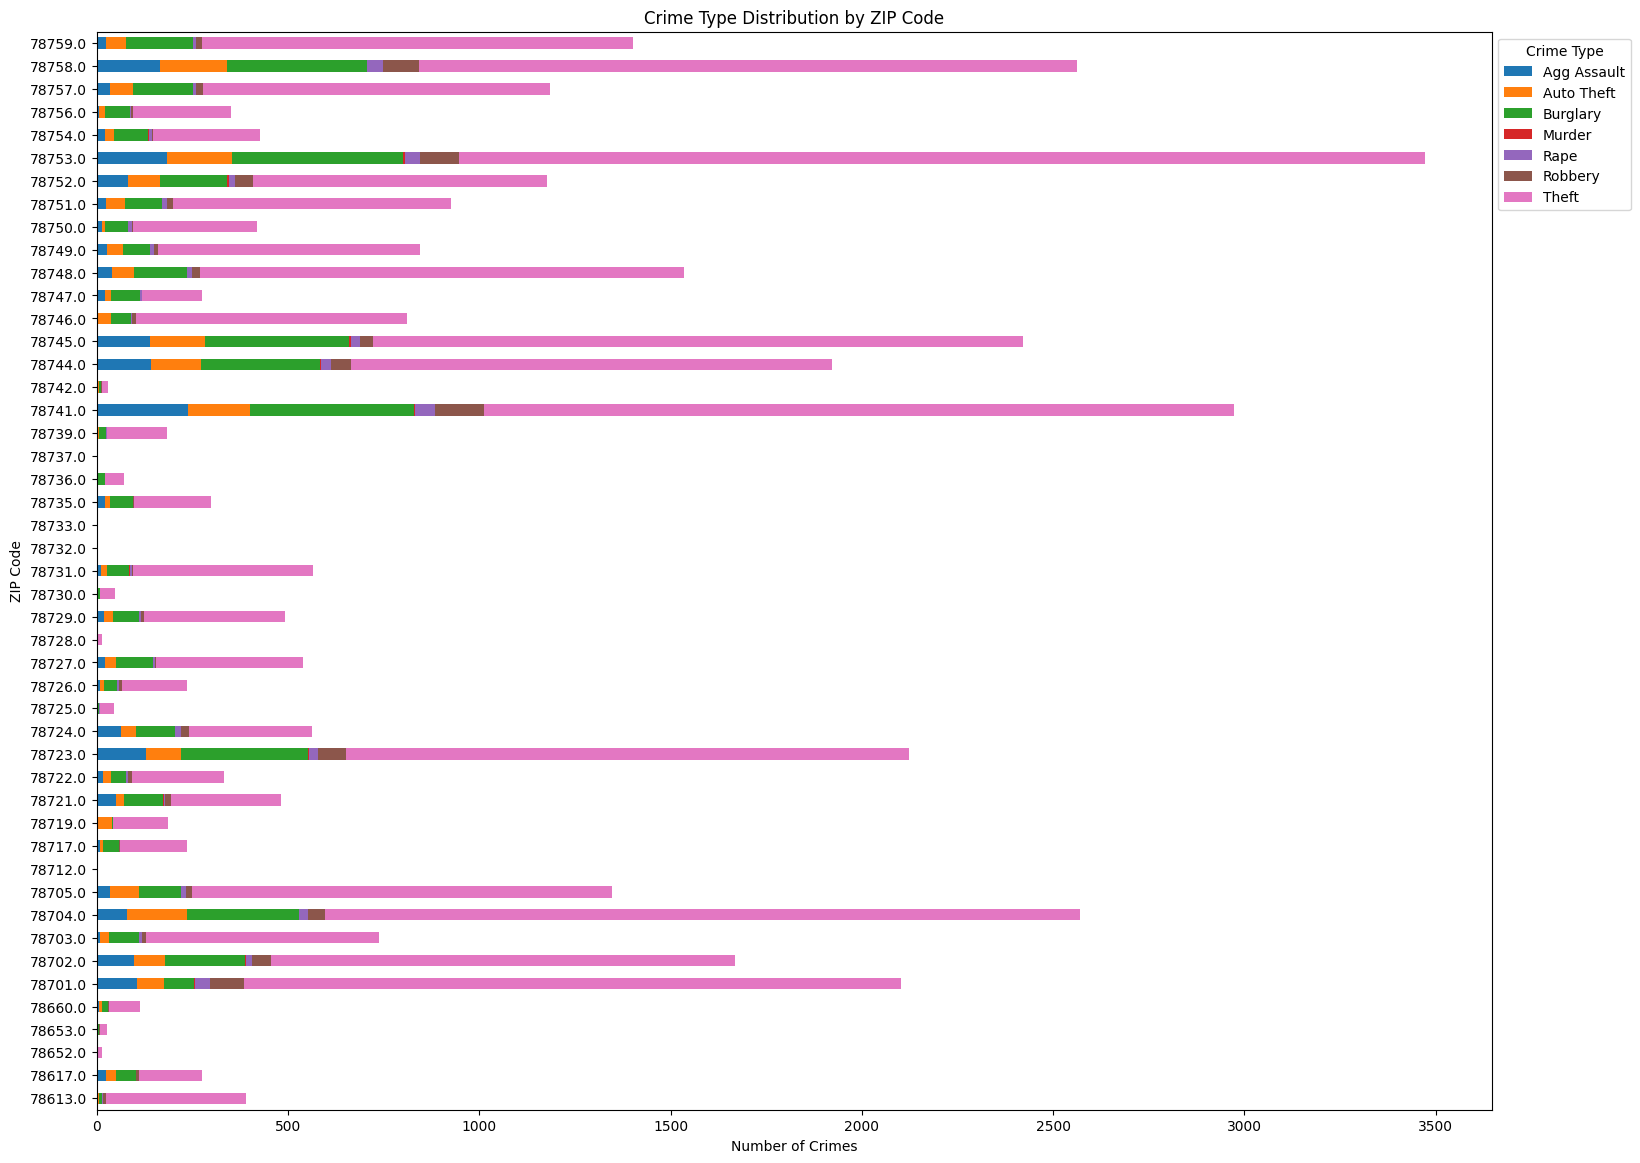

In [15]:
crime_cleaned_df = crime_df.dropna(subset=['Highest_NIBRS_UCR_Offense_Description', 'Zip_Code_Crime'])
crime_cleaned_df = crime_cleaned_df.groupby(['Zip_Code_Crime', 'Highest_NIBRS_UCR_Offense_Description']).size().unstack(fill_value=0)
crime_cleaned_df.plot(kind='barh', stacked=True, figsize=(18, 14))
plt.xlabel('Number of Crimes')
plt.ylabel('ZIP Code')
plt.title('Crime Type Distribution by ZIP Code')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1))
plt.show()

### Comparison of crime counts in low income vs high income zipcodes

C:\Users\jonah\AppData\Local\Temp\ipykernel_12220\2947905149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned_df['Medianhouseholdincome'] = crime_cleaned_df['Medianhouseholdincome'].str.replace('$','').astype(float)


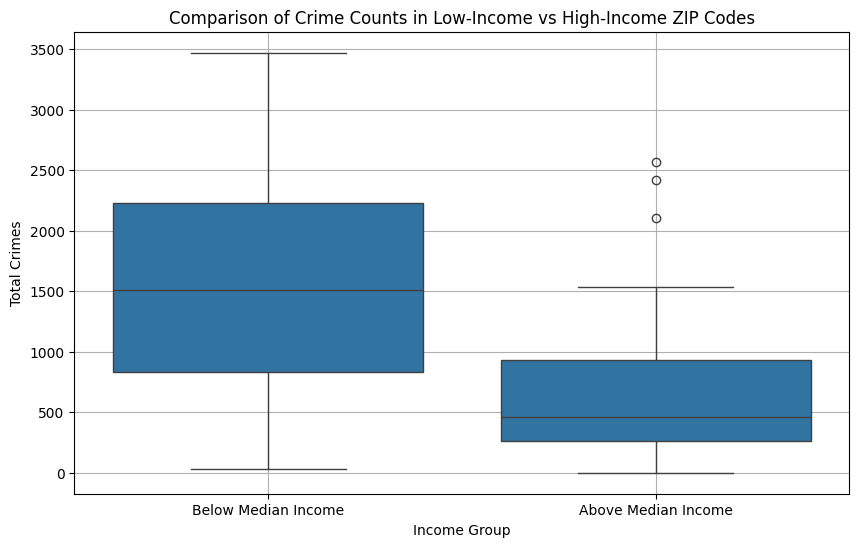

In [16]:
crime_cleaned_df = crime_df.dropna(subset=['Medianhouseholdincome'])
crime_cleaned_df['Medianhouseholdincome'] = crime_cleaned_df['Medianhouseholdincome'].str.replace('$','').astype(float)
median_income = crime_cleaned_df['Medianhouseholdincome'].median()
low_income = crime_cleaned_df[crime_cleaned_df['Medianhouseholdincome'] <= median_income]
high_income = crime_cleaned_df[crime_cleaned_df['Medianhouseholdincome'] > median_income]
low_income_counts = low_income.groupby('Zip_Code_Crime')['Key'].count().reset_index(name='Total_Crimes')
high_income_counts = high_income.groupby('Zip_Code_Crime')['Key'].count().reset_index(name='Total_Crimes')
low_income_counts = low_income_counts[low_income_counts['Total_Crimes'] > 0]
high_income_counts = high_income_counts[high_income_counts['Total_Crimes'] > 0]
low_income_counts['Income_Group'] = 'Below Median Income'
high_income_counts['Income_Group'] = 'Above Median Income'
combined_crime_counts = pd.concat([low_income_counts, high_income_counts])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income_Group', y='Total_Crimes', data=combined_crime_counts)
plt.title('Comparison of Crime Counts in Low-Income vs High-Income ZIP Codes')
plt.ylabel('Total Crimes')
plt.xlabel('Income Group')
plt.grid(True)
plt.show()

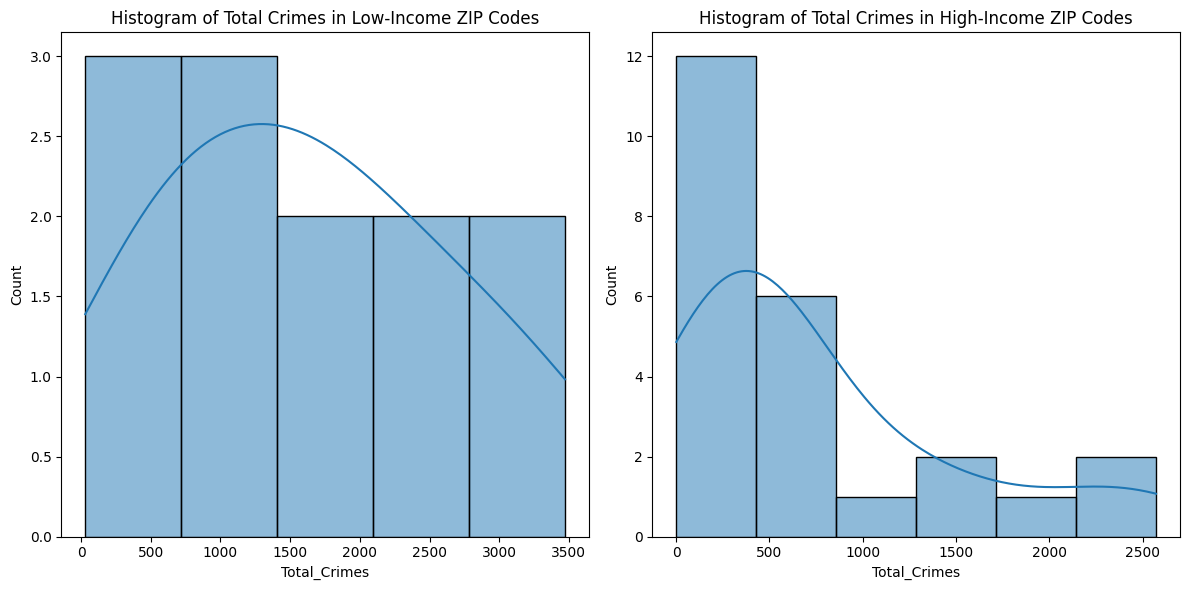

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(low_income_counts['Total_Crimes'], kde=True)
plt.title('Histogram of Total Crimes in Low-Income ZIP Codes')
plt.subplot(1, 2, 2)
sns.histplot(high_income_counts['Total_Crimes'], kde=True)
plt.title('Histogram of Total Crimes in High-Income ZIP Codes')
plt.tight_layout()
plt.show()

In [18]:
u_stat, u_p_value = mannwhitneyu(low_income_counts['Total_Crimes'], high_income_counts['Total_Crimes'], alternative='two-sided')
print(f"Mann-Whitney U Statistic: {u_stat}, P-value: {u_p_value}")

Mann-Whitney U Statistic: 218.0, P-value: 0.013638083623341455
